# Applied Capstone Project - The Battle of Neighborhoods

# Determine New Store Locations in Manhattan for a Cosmetic Shop

## 1. Introduction and Discussion of the Business Objective

#### Problem Background and Description
Manhattan , is the most densely populated of the five boroughs of New York City. Manhattan serves as the city's economic and administrative center, cultural identifier, and historical birthplace.The borough consists mostly of Manhattan Island, bounded by the Hudson, East, and Harlem rivers; as well as several small adjacent islands. Manhattan additionally contains Marble Hill, a small neighborhood now on the U.S. mainland, that was connected using landfill to the Bronx and separated from the rest of Manhattan by the Harlem River. Manhattan Island is divided into three informally bounded components, each aligned with the borough's long axis: Lower, Midtown, and Upper Manhattan. 

Manhattan has been described as the cultural, financial, media, and entertainment capital of the world, and the borough hosts the United Nations Headquarters. MEG Company produces cosmetic products, they have some stores in Europe but they also want to built a store in Manhattan. They puts lots of work on their Research and Development projects and eventually improved an eyeshadow palet that has tones of colour on it and they also care about human skin health and regulations about chemicals. Before they release the product to the market; MEG Company's manager decide to allocate this project to me. Manager also want from me to build a system that can help in reccommending new places for their new Cosmetic Shop that will open in Manhattan. This will be a major part of their decision-making process. MEG Company want to position for their new shop in high traffic areas where consumers go restaurants, cafes.

#### Criteria
According to information provided by another company that have shops in Manhattan suggests that the best locations to open new Cosmetic Shop stores may not only be where other Cosmetic Shops are located. This data strongly suggests that the best places are in fact areas that are near Italıan Restaurants, Cafés, Coffee Shops and Hotels. The people live in Manhattan are very social people that frequent these place often.

The analysis and recommendations for this new store locations will provide us on general districts with these establishments, not on specific store addresses. Narrowing down the best district options derived from analysis allows for either further research to be conducted, or on the ground searching for specific sites by the company's personnel.


## 2. Data Requirements

#### Data Collection 

The number of main districts in Manhattan is 40. The data regarding the districts in Manhattan needs to be provided for this analyses. Before the exploratory analyses, raw data is not a usable form. We need to prepare the data to turn its usable form to do so firstly data wrangling and cleaning will have to be performed. I am able to rich the list of Boroughs in NewYork from https://cocl.us/new_york_dataset.

NewYork has 5 boroughs and 306 neighborhoods. After that we need the data includes just Manhattan's neighborhoods, latitudes and longtitudes. The cleansed data will be used with Foursquare data.

#### Data Analysis and Location Data:

* Foursquare data will be usefull to explore or compare districts around Manhattan.
* Foursquare data will gives us the venues, latitudes and longtitudes and venues' catagory which will help us to determine the possible areas for Cosmetic Shop.
* Data manipulation and analysis to derive subsets of the initial data.

## 3. Methodology 

#### Visualization:

* Analysis and plotting for visualizations.
* Data visualization using various mapping libraries.

#### Exploratory and Inferential Analyses

* Clustering algorithms will be used to cluster the data.
* Italıan Restaurants, Cafés, Coffee Shops and Hotels: These are the venue types that the client wants to add the analyses because of these venues have a powerfull density for the ideal store locations.
* Inferential analysis will be made using the data and this provides us to make reccomendations for possible locations to new Cosmetic Shop store.

## 4. Results

#### Chosen the Neighborhood
When the 4 venue types have been added to analyses, we are ablo to determine the neighborhoods that are positioned with Restaurants, Cafés, Coffee Shops, Hotels and adding Cosmetic Shop to this analysis will give us the possible neighborhoods.
So we can increase the types of venues to include Restaurants, Cafés, Coffee Shops, Hotels and Cosmetic Shops; which narrows down our possible neighborhoods and give us the chance to focus the suggested districts for new store will be located in Manhattan.
Finally, 7 prospective neighborhoods that include 5 criterias are determined for new store, these areas listed below:

#### Hudson Yards
#### Flatiron
#### Midtown South
#### Civic Center
#### Carnegie Hill
#### Little Italy 
#### Greenwich Village

## 5. Discussion and Conclusions:

#### Discussion and Conclusions:

* Recomendations and results based on the data analysis.

As a result of these inferences, the data is able to provide us for possible location recommendations, but we could not determine the exact point for the new store. There is no accurate answer because this analyses are based on the criteria (types of venues), maybe our options can be narrow down if the different types of venues had been chosed. This results are the best districts to match our criteria.

* Conclusions

There are many ways to perform this analysis using a different methodology and maybe even different data source. I worked with clustering algorithms to cluster the data but I see that the results have no accurate endpoint because this is based on the criterias that are chosen by us. On the other hand this data analysis recommendations helped us to narrow down the possible options and it gave to us a startpoint for the possible exact store points. 

### Import the Required Libraries

In [1]:
# Import libraries
import numpy as np # library to handle data in a vectorized manner
import json # library to handle JSON files
import pandas as pd

In [2]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from bs4 import BeautifulSoup

# Import k-means from clustering stage
from sklearn.cluster import KMeans
print('Libraries imported.')

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.
Solving environment: ...working... done

# All requested packages already installed.



In [3]:
from urllib.request import urlopen
with urlopen('https://cocl.us/new_york_dataset') as story:
    story_words = []
    for line in story:
        line_words = line.decode('utf-8').split()
        for word in line_words:
            story_words.append(word)

In [4]:
import wget
url = "https://cocl.us/new_york_dataset"
file = wget.download(url,out='newyork_data.json')
print(file)

100% [............................................................................] 115774 / 115774newyork_data (2).json


### Data Preparation

import wget
url = "http://api.example.com/tracks/41078914/stream?client_id=d97babdd9960f87d30831e0eb9d"
file = wget.download(url,out="myFile.mp3")
print(file)

In [5]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [6]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [7]:
neighborhoods_data = newyork_data['features']

In [8]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [9]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [10]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [11]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [12]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


### Methodology and Exploratory Data Analysis

#### Use geopy library to get the latitude and longitude values of Manhattan

In [13]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [14]:
manhattan_data.shape

(40, 4)

In [15]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


#### Create a map of Manhattan with neighborhoods superimposed on top.


In [16]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

#### Define Foursquare Credentials and Version


In [17]:
CLIENT_ID = 'RUWLLGAAE5WWYY25CW3GMYKCPB5AD0LY13ZOC2GLHP45UC2K' # your Foursquare ID
CLIENT_SECRET = 'OGDNMGI3B0QYWAACYX34L5J22PQ5O2ZUPYDUES1D3FTYIVBT' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RUWLLGAAE5WWYY25CW3GMYKCPB5AD0LY13ZOC2GLHP45UC2K
CLIENT_SECRET:OGDNMGI3B0QYWAACYX34L5J22PQ5O2ZUPYDUES1D3FTYIVBT


#### Explore the first district in our dataframe to become familiar with the data

In [18]:
manhattan_data.loc[0, 'Neighborhood']

'Marble Hill'

In [19]:
neighborhood_latitude = manhattan_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = manhattan_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = manhattan_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Marble Hill are 40.87655077879964, -73.91065965862981.


#### Get the top 100 venues that are in Marble Hill within a radius of 500 meters.

In [20]:
# Limit of number of venues returned by Foursquare API
LIMIT = 100

# Define radius
radius = 500

# Create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

# Display URL
url

'https://api.foursquare.com/v2/venues/explore?&client_id=RUWLLGAAE5WWYY25CW3GMYKCPB5AD0LY13ZOC2GLHP45UC2K&client_secret=OGDNMGI3B0QYWAACYX34L5J22PQ5O2ZUPYDUES1D3FTYIVBT&v=20180605&ll=40.87655077879964,-73.91065965862981&radius=500&limit=100'

In [21]:
# Send the GET request and examine the results
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e6920c9006dce001b65c378'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Marble Hill',
  'headerFullLocation': 'Marble Hill, New York',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 24,
  'suggestedBounds': {'ne': {'lat': 40.88105078329964,
    'lng': -73.90471933917806},
   'sw': {'lat': 40.87205077429964, 'lng': -73.91659997808156}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b4429abf964a52037f225e3',
       'name': "Arturo's",
       'location': {'address': '5198 Broadway',
        'crossStreet': 'at 225th St.',
        'lat': 40.87441177110231,
        'lng': -73.91027100981574,
        'labeledLatLngs': [{'label'

In [22]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### Structure the json file into a pandas dataframe

In [23]:
# clean the json and structure it into a pandas dataframe.
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Arturo's,Pizza Place,40.874412,-73.910271
1,Bikram Yoga,Yoga Studio,40.876844,-73.906204
2,Tibbett Diner,Diner,40.880404,-73.908937
3,Dunkin',Donut Shop,40.877136,-73.906666
4,Starbucks,Coffee Shop,40.877531,-73.905582


In [24]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

24 venues were returned by Foursquare.


#### Create a nearby venues function for all the neighborhoods in Manhattan.

In [25]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Create a new dataframe called manhattan_venues.

In [28]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [29]:
print(manhattan_venues.shape)
manhattan_venues.head()

(3313, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop
4,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop


#### Check how many venues were returned for each neighborhood

In [30]:
manhattan_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park City,95,95,95,95,95,95
Carnegie Hill,100,100,100,100,100,100
Central Harlem,46,46,46,46,46,46
Chelsea,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100
Civic Center,100,100,100,100,100,100
Clinton,100,100,100,100,100,100
East Harlem,41,41,41,41,41,41
East Village,100,100,100,100,100,100


#### Calculate how many unique venue categories there are

In [31]:
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 343 uniques categories.


#### Analyze each of the Neighborhoods

In [32]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Vietnamese Restaurant,Volleyball Court,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
manhattan_onehot.shape

(3313, 344)

#### Group rows by neighborhood and take the mean of the frequency of occurrence of each category

In [34]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Vietnamese Restaurant,Volleyball Court,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Battery Park City,0.000000,0.00,0.00,0.000000,0.010526,0.00,0.00,0.000000,0.000000,...,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.031579,0.000000,0.031579,0.000000
1,Carnegie Hill,0.000000,0.00,0.00,0.000000,0.010000,0.00,0.00,0.000000,0.000000,...,0.020000,0.00,0.000000,0.00,0.00,0.010000,0.030000,0.000000,0.010000,0.030000
2,Central Harlem,0.000000,0.00,0.00,0.065217,0.043478,0.00,0.00,0.000000,0.000000,...,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
3,Chelsea,0.000000,0.00,0.00,0.000000,0.030000,0.00,0.00,0.000000,0.000000,...,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.030000,0.000000,0.010000,0.000000
4,Chinatown,0.000000,0.00,0.00,0.000000,0.040000,0.00,0.00,0.000000,0.000000,...,0.040000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.010000
5,Civic Center,0.000000,0.00,0.00,0.000000,0.030000,0.01,0.00,0.000000,0.000000,...,0.000000,0.00,0.000000,0.00,0.00,0.020000,0.020000,0.010000,0.000000,0.030000
6,Clinton,0.000000,0.00,0.00,0.000000,0.040000,0.00,0.00,0.000000,0.000000,...,0.000000,0.00,0.000000,0.00,0.00,0.020000,0.030000,0.000000,0.000000,0.000000
7,East Harlem,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,...,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
8,East Village,0.000000,0.00,0.00,0.000000,0.020000,0.00,0.00,0.010000,0.010000,...,0.020000,0.00,0.000000,0.00,0.00,0.050000,0.010000,0.000000,0.000000,0.000000
9,Financial District,0.010000,0.00,0.00,0.000000,0.050000,0.00,0.00,0.000000,0.000000,...,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.030000,0.000000,0.010000,0.000000


In [35]:
manhattan_grouped.shape

(40, 344)

#### Print each neighborhood with it's top 10 most common venues

In [36]:
num_top_venues = 10

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
           venue  freq
0           Park  0.07
1    Coffee Shop  0.06
2          Hotel  0.05
3  Shopping Mall  0.03
4  Women's Store  0.03
5  Memorial Site  0.03
6      Wine Shop  0.03
7            Gym  0.03
8    Pizza Place  0.02
9     Food Court  0.02


----Carnegie Hill----
                  venue  freq
0           Coffee Shop  0.06
1           Pizza Place  0.06
2                  Café  0.05
3  Gym / Fitness Center  0.03
4        Cosmetics Shop  0.03
5             Bookstore  0.03
6     French Restaurant  0.03
7                Bakery  0.03
8         Grocery Store  0.03
9                   Gym  0.03


----Central Harlem----
                 venue  freq
0   African Restaurant  0.07
1                  Bar  0.04
2   Seafood Restaurant  0.04
3    French Restaurant  0.04
4       Cosmetics Shop  0.04
5  Fried Chicken Joint  0.04
6  American Restaurant  0.04
7   Chinese Restaurant  0.04
8                  Spa  0.02
9                  Gym  0.02


----Chelsea----
     

                      venue  freq
0        Italian Restaurant  0.06
1               Coffee Shop  0.04
2                       Bar  0.04
3                  Wine Bar  0.04
4                      Café  0.04
5         Indian Restaurant  0.03
6  Mediterranean Restaurant  0.03
7                    Bakery  0.03
8        Seafood Restaurant  0.02
9            Ice Cream Shop  0.02


----Washington Heights----
                venue  freq
0                Café  0.06
1       Grocery Store  0.04
2              Bakery  0.04
3   Mobile Phone Shop  0.03
4     Supplement Shop  0.02
5         Coffee Shop  0.02
6  Mexican Restaurant  0.02
7                Park  0.02
8                 Gym  0.02
9      Sandwich Place  0.02


----West Village----
                     venue  freq
0       Italian Restaurant  0.09
1  New American Restaurant  0.06
2           Cosmetics Shop  0.05
3      American Restaurant  0.05
4                 Wine Bar  0.04
5             Cocktail Bar  0.04
6                     Park  0.04
7 

In [37]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### The top 10 venue categories for each neighborhood

In [38]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
manhattan_venues_sorted = pd.DataFrame(columns=columns)
manhattan_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    manhattan_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

manhattan_venues_sorted.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Coffee Shop,Hotel,Women's Store,Memorial Site,Shopping Mall,Gym,Wine Shop,Boat or Ferry,Food Court
1,Carnegie Hill,Pizza Place,Coffee Shop,Café,Bookstore,Cosmetics Shop,Grocery Store,Gym,Gym / Fitness Center,Bakery,Japanese Restaurant
2,Central Harlem,African Restaurant,Fried Chicken Joint,French Restaurant,American Restaurant,Chinese Restaurant,Cosmetics Shop,Seafood Restaurant,Bar,Metro Station,Southern / Soul Food Restaurant
3,Chelsea,Coffee Shop,Italian Restaurant,Bakery,Wine Shop,American Restaurant,Ice Cream Shop,Theater,Hotel,Sushi Restaurant,Cupcake Shop
4,Chinatown,Chinese Restaurant,Cocktail Bar,American Restaurant,Vietnamese Restaurant,Hotpot Restaurant,Optical Shop,Spa,Bakery,Salon / Barbershop,Bar
5,Civic Center,Coffee Shop,Gym / Fitness Center,Hotel,French Restaurant,Yoga Studio,Spa,Park,American Restaurant,Bakery,Sandwich Place
6,Clinton,Theater,Italian Restaurant,Gym / Fitness Center,American Restaurant,Coffee Shop,Sandwich Place,Wine Shop,Spa,Hotel,Lounge
7,East Harlem,Mexican Restaurant,Bakery,Latin American Restaurant,Thai Restaurant,Deli / Bodega,French Restaurant,Spa,Liquor Store,Taco Place,Gas Station
8,East Village,Bar,Wine Bar,Ice Cream Shop,Pizza Place,Mexican Restaurant,Chinese Restaurant,Cocktail Bar,Ramen Restaurant,Italian Restaurant,Japanese Restaurant
9,Financial District,Coffee Shop,American Restaurant,Bar,Gym,Pizza Place,Gym / Fitness Center,Hotel,Steakhouse,Food Truck,Event Space


In [39]:
manhattan_venues_sorted.shape

(40, 11)

### Venues criteria specified by the client : 'Italian Restaurants', 'Cafés' , 'Coffee Shop' and 'Hotel'

These are the venue types that the client wants to have an abundant density of in the ideal store locations.

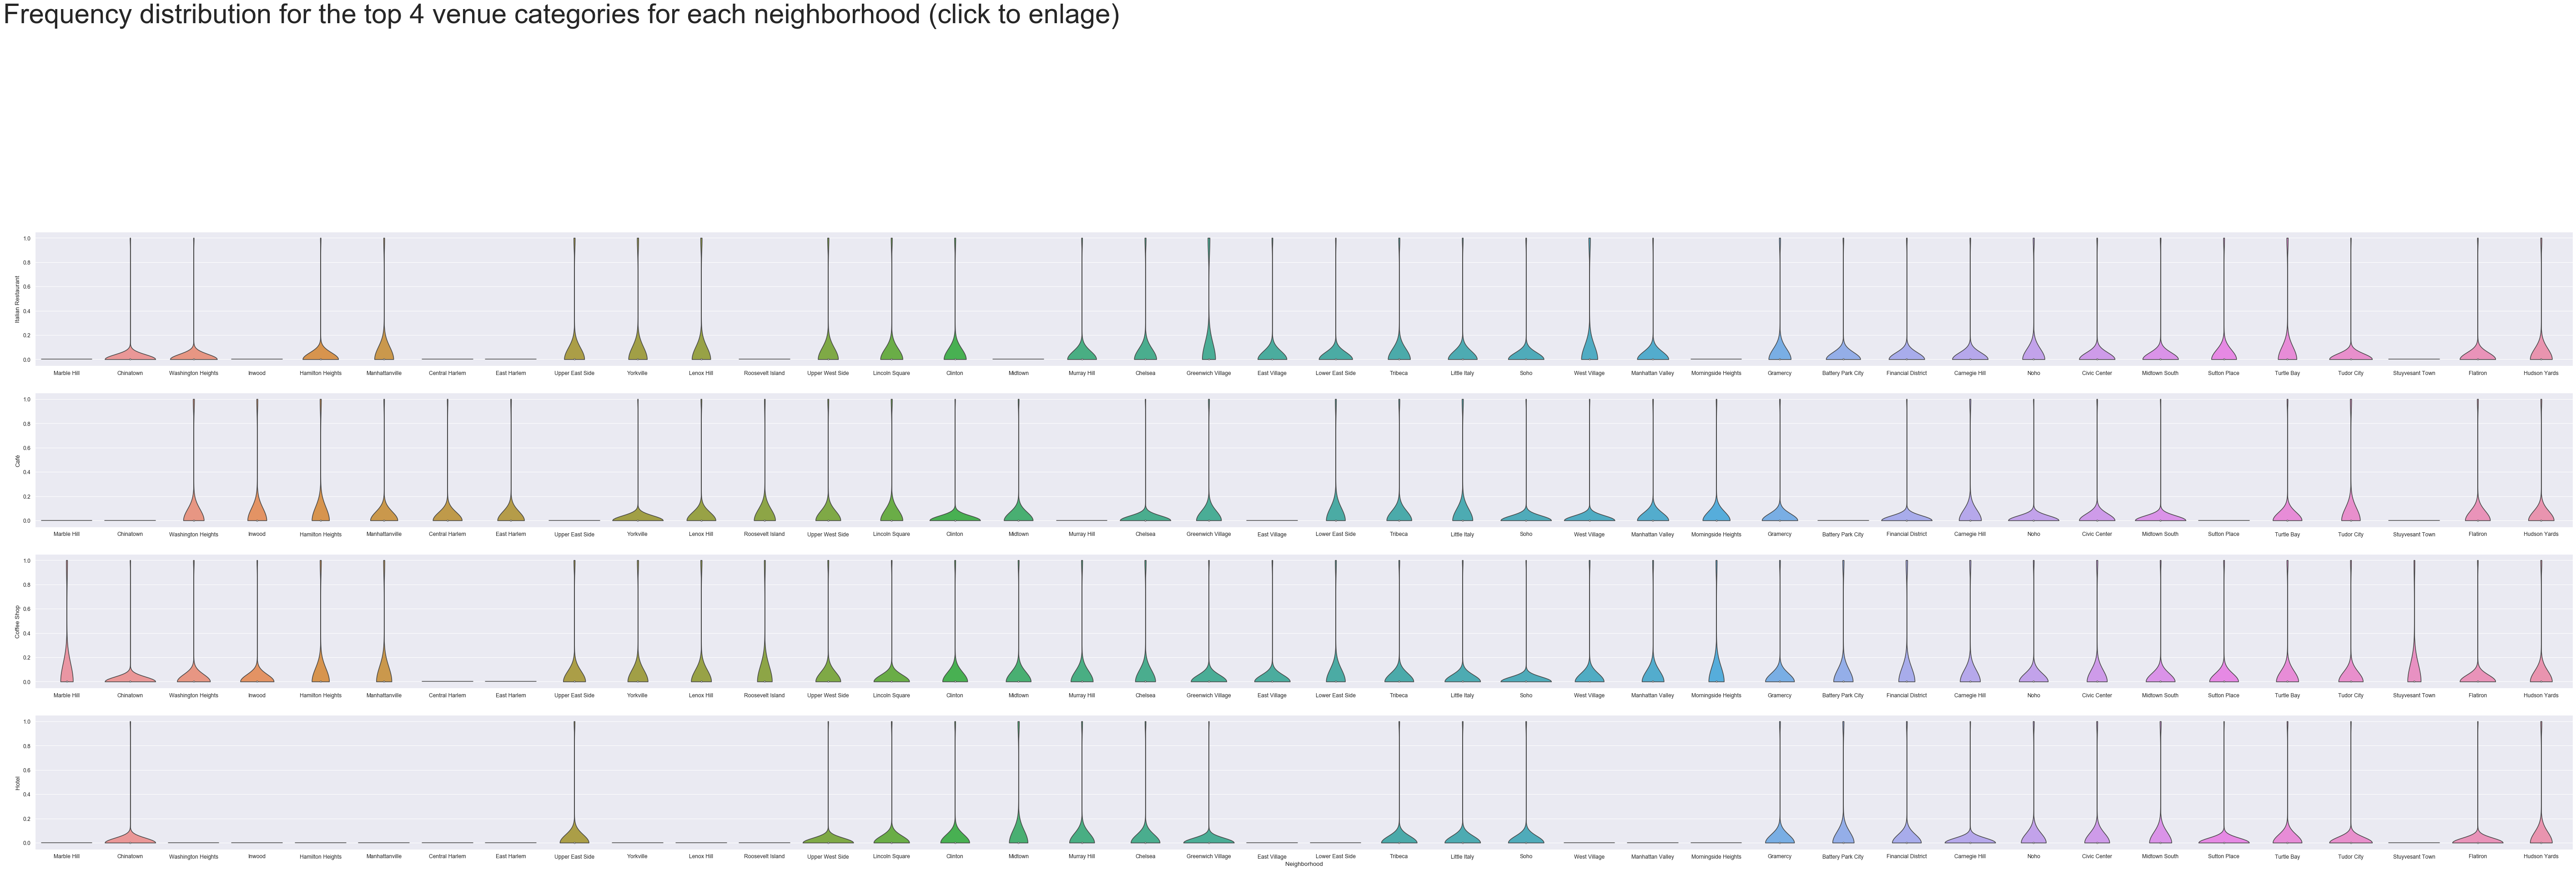

In [40]:
# Categorical plot
# A violin plot is used and the top 4 venue types as specified by the client for each neighborhood are used for the plotting.

import seaborn as sns

fig = plt.figure(figsize=(100,25))
sns.set(font_scale=1.1)

ax = plt.subplot(4,1,1)
sns.violinplot(x="Neighborhood", y="Italian Restaurant", data=manhattan_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(4,1,2)
sns.violinplot(x="Neighborhood", y="Café", data=manhattan_onehot, cut=0);
plt.xlabel("")

plt.subplot(4,1,3)
sns.violinplot(x="Neighborhood", y="Coffee Shop", data=manhattan_onehot, cut=0);
plt.xlabel("")

plt.subplot(4,1,4)
sns.violinplot(x="Neighborhood", y="Hotel", data=manhattan_onehot, cut=0);

ax.text(-1.0, 4.1, 'Frequency distribution for the top 4 venue categories for each neighborhood (click to enlage)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_4_categories.png", dpi=240)
plt.show()


### Neighborhoods
#### So as we can see from the analysis there are 17 neighborhoods to open new stores ; according to the criteria that they have the 4 specified venues in a great frequency (Italian Restaurants, Cafés, Coffee Shops and Hotels). They are as follows:

* Hudson Yards
* Flatiron
* Turtle Bay
* MidTown South
* Civic Center
* Noho
* Carnegie Hill
* Financial District
* Gramercy
* Soho
* Little Italy
* Tribeca
* Greenwich Village
* Chelsea
* Clinton
* Lincoln Square
* Upper West Side

### Take this analysis further

We have the 17 neighborhoods that all include the venue category criteria. But if we included the "Cosmetics Shop" venue category into the analysis, then we might be able to make some inferences based on the data to focus the possible districts.

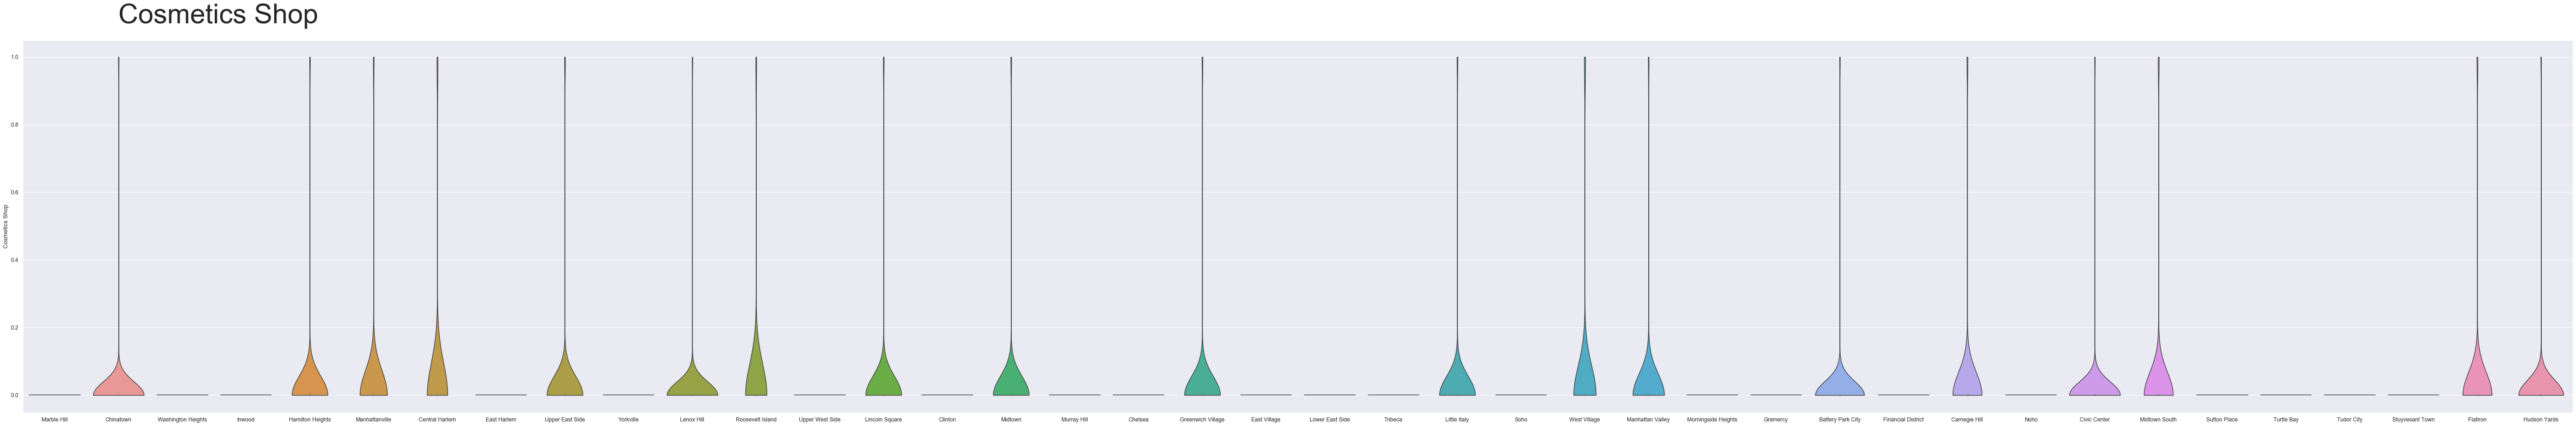

In [41]:
# Add the Cosmetic Shop to explore this category
import seaborn as sns

fig = plt.figure(figsize=(100,15))
sns.set(font_scale=1.1)

ax = plt.subplot(1,1,1)
sns.violinplot(x="Neighborhood", y="Cosmetics Shop", data=manhattan_onehot, cut=0);
plt.xlabel("")

ax.text(1.0, 1.1, 'Cosmetics Shop', fontsize=60)
plt.savefig ("Distribution_Frequency_Cosmetics Shop_Venues.png", dpi=240)
plt.show()

#### Let's add this to the analysis with the other 4 specified categories as below.

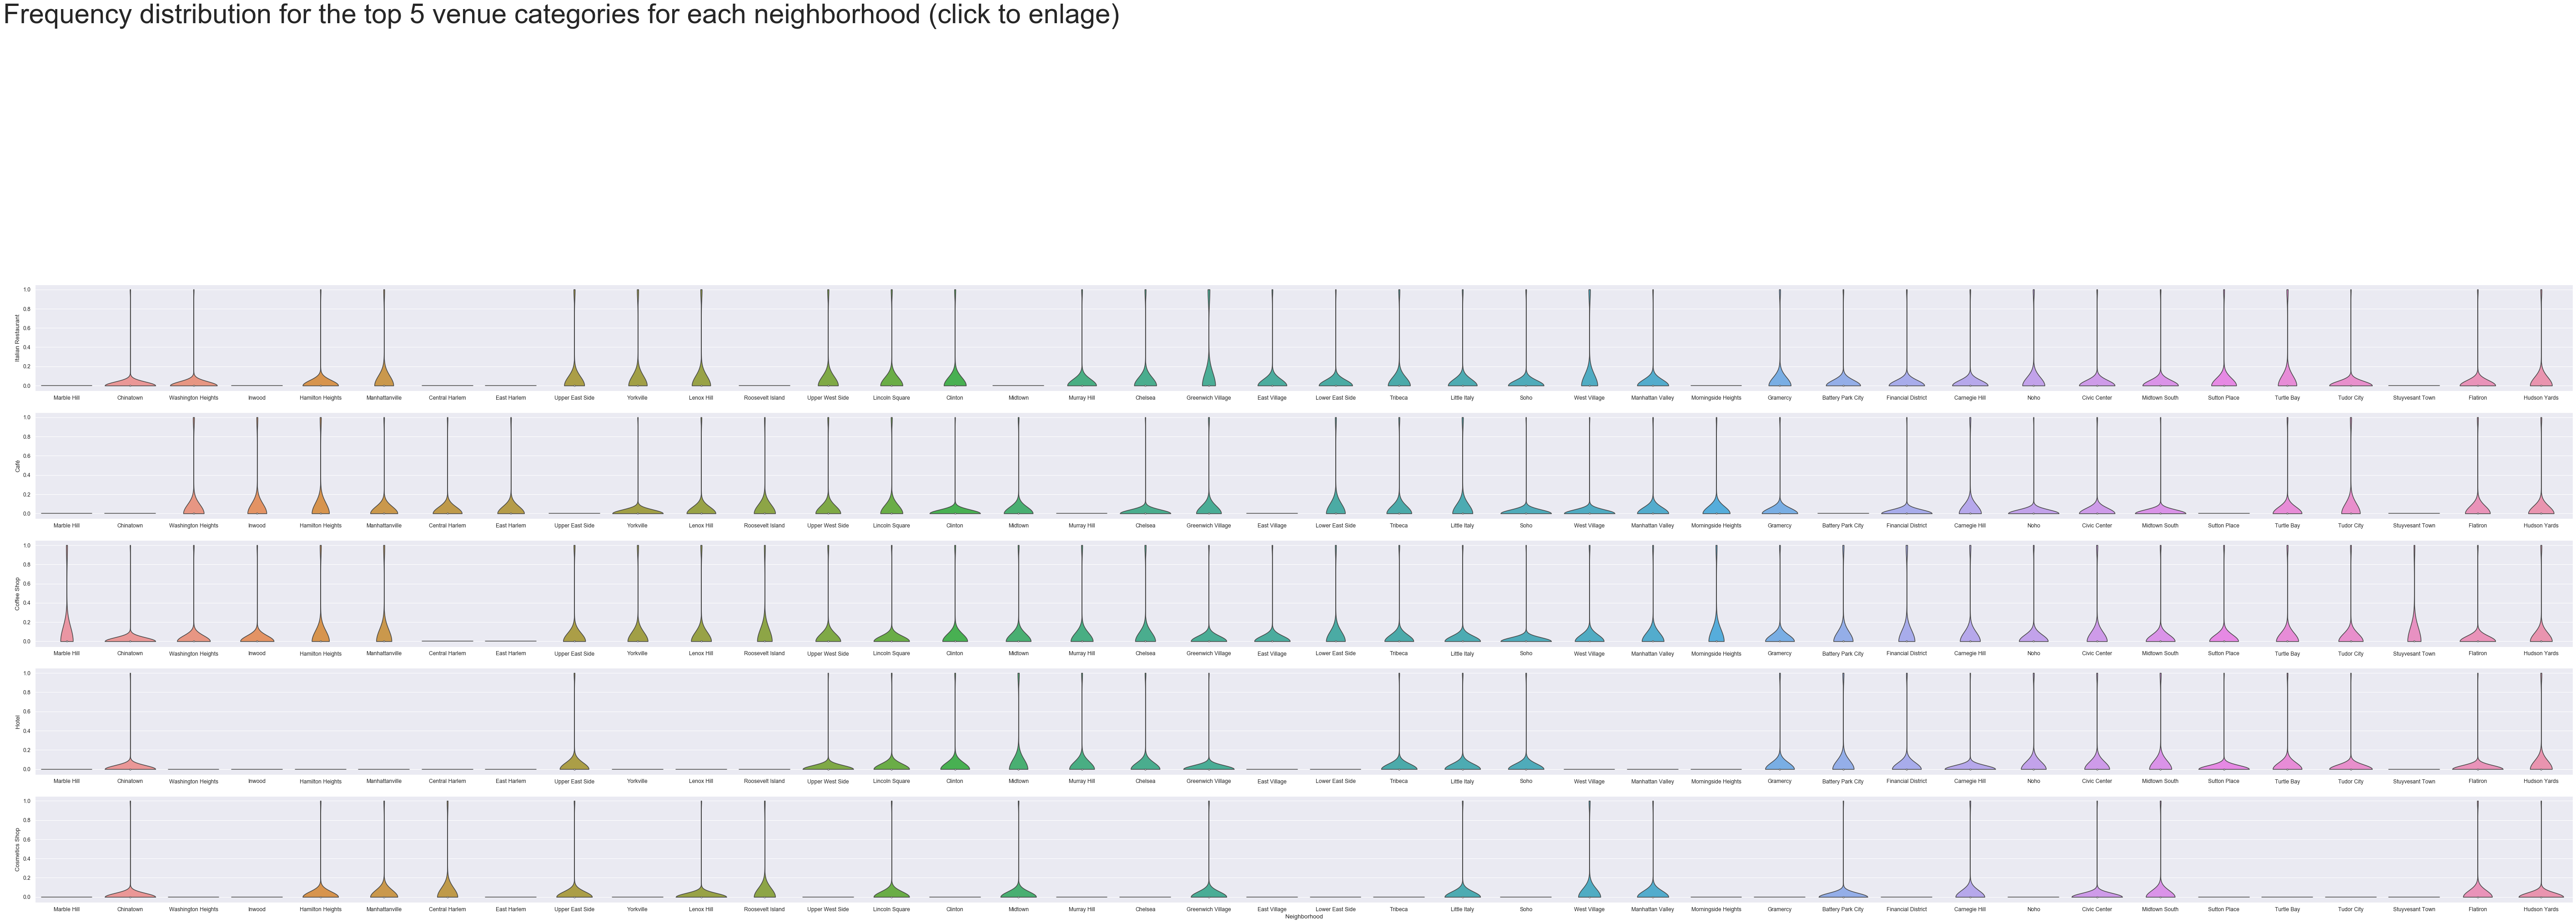

In [42]:
fig = plt.figure(figsize=(100,25))
sns.set(font_scale=1.1)

ax = plt.subplot(5,1,1)
sns.violinplot(x="Neighborhood", y="Italian Restaurant", data=manhattan_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(5,1,2)
sns.violinplot(x="Neighborhood", y="Café", data=manhattan_onehot, cut=0);
plt.xlabel("")

plt.subplot(5,1,3)
sns.violinplot(x="Neighborhood", y="Coffee Shop", data=manhattan_onehot, cut=0);
plt.xlabel("")

plt.subplot(5,1,4)
sns.violinplot(x="Neighborhood", y="Hotel", data=manhattan_onehot, cut=0);
plt.xlabel("")

plt.subplot(5,1,5)
sns.violinplot(x="Neighborhood", y="Cosmetics Shop", data=manhattan_onehot, cut=0);

ax.text(-1.0, 5.1, 'Frequency distribution for the top 5 venue categories for each neighborhood (click to enlage)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_5_categories.png", dpi=240)
plt.show()

### Results


#### Chosen the Neighborhood
When the 4 venue types have been added to analyses, we are ablo to determine the neighborhoods that are positioned with Restaurants, Cafés, Coffee Shops, Hotels and adding Cosmetic Shops to this analysis will gives us the possible neighborhoods.
So we can increase the types of venues to include Restaurants, Cafés, Coffee Shops, Hotels and Cosmetic Shops, which narrows down our possible neighborhoods and give us the chance to focus the suggested districts for new stores will be located in Manhattan.
Finally, 7 prospective neighborhoods that include 5 criterias are determined for the new store, these areas listed below:

#### Hudson Yards
#### Flatiron
#### Midtown South
#### Civic Center
#### Carnegie Hill
#### Little Italy 
#### Greenwich Village

## Finally, create a map to show our determined 7 neighborhoods.

In [43]:
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [44]:
manhattan_data.loc[39, 'Neighborhood']

neighborhood_latitude = manhattan_data.loc[39, 'Latitude'] # Neighborhood latitude value
neighborhood_longitude = manhattan_data.loc[39, 'Longitude'] # Neighborhood longitude value

neighborhood_name = manhattan_data.loc[39, 'Neighborhood'] # Neighborhood name

print('Latitude and longitude values of the neighborhood {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

manhattan_data.loc[38, 'Neighborhood']

neighborhood_latitude = manhattan_data.loc[38, 'Latitude'] # Neighborhood latitude value
neighborhood_longitude = manhattan_data.loc[38, 'Longitude'] # Neighborhood longitude value

neighborhood_name = manhattan_data.loc[38, 'Neighborhood'] # Neighborhood name

print('Latitude and longitude values of the neighborhood {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

manhattan_data.loc[33, 'Neighborhood']

neighborhood_latitude = manhattan_data.loc[33, 'Latitude'] # Neighborhood latitude value
neighborhood_longitude = manhattan_data.loc[33, 'Longitude'] # Neighborhood longitude value

neighborhood_name = manhattan_data.loc[33, 'Neighborhood'] # Neighborhood name

print('Latitude and longitude values of the neighborhood {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

manhattan_data.loc[32, 'Neighborhood']

neighborhood_latitude = manhattan_data.loc[32, 'Latitude'] # Neighborhood latitude value
neighborhood_longitude = manhattan_data.loc[32, 'Longitude'] # Neighborhood longitude value

neighborhood_name = manhattan_data.loc[32, 'Neighborhood'] # Neighborhood name

print('Latitude and longitude values of the neighborhood {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

manhattan_data.loc[30, 'Neighborhood']

neighborhood_latitude = manhattan_data.loc[30, 'Latitude'] # Neighborhood latitude value
neighborhood_longitude = manhattan_data.loc[30, 'Longitude'] # Neighborhood longitude value

neighborhood_name = manhattan_data.loc[30, 'Neighborhood'] # Neighborhood name

print('Latitude and longitude values of the neighborhood {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

manhattan_data.loc[22, 'Neighborhood']

neighborhood_latitude = manhattan_data.loc[22, 'Latitude'] # Neighborhood latitude value
neighborhood_longitude = manhattan_data.loc[22, 'Longitude'] # Neighborhood longitude value

neighborhood_name = manhattan_data.loc[22, 'Neighborhood'] # Neighborhood name

print('Latitude and longitude values of the neighborhood {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

manhattan_data.loc[18, 'Neighborhood']

neighborhood_latitude = manhattan_data.loc[18, 'Latitude'] # Neighborhood latitude value
neighborhood_longitude = manhattan_data.loc[18, 'Longitude'] # Neighborhood longitude value

neighborhood_name = manhattan_data.loc[18, 'Neighborhood'] # Neighborhood name

print('Latitude and longitude values of the neighborhood {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of the neighborhood Hudson Yards are 40.75665808227519, -74.00011136202637.
Latitude and longitude values of the neighborhood Flatiron are 40.739673047638426, -73.9909471052826.
Latitude and longitude values of the neighborhood Midtown South are 40.7485096643122, -73.98871313285247.
Latitude and longitude values of the neighborhood Civic Center are 40.71522892046282, -74.00541529873355.
Latitude and longitude values of the neighborhood Carnegie Hill are 40.7826825671257, -73.95325646837112.
Latitude and longitude values of the neighborhood Little Italy are 40.71932379395907, -73.99730467208073.
Latitude and longitude values of the neighborhood Greenwich Village are 40.72693288536128, -73.99991402945902.


In [45]:
import pandas as pd
data = [['Hudson Yards',40.75665808227519,-74.00011136202637], ['Flatiron', 40.739673047638426,-73.9909471052826] , ['Midtown South',40.7485096643122,-73.98871313285247] , ['Civic Center',40.71522892046282 ,-74.00541529873355] ,
        ['Carnegie Hill',40.7826825671257, -73.95325646837112], ['Little Italy', 40.71932379395907, -73.99730467208073] , ['Greenwich Village',40.72693288536128, -73.99991402945902]]

In [46]:
districts = pd.DataFrame(data,columns=['Neighborhood','Latitude','Longitude'])
districts.head(10)

,Neighborhood,Latitude,Longitude
0,Hudson Yards,40.756658,-74.000111
1,Flatiron,40.739673,-73.990947
2,Midtown South,40.748510,-73.988713
3,Civic Center,40.715229,-74.005415
4,Carnegie Hill,40.782683,-73.953256
5,Little Italy,40.719324,-73.997305
6,Greenwich Village,40.726933,-73.999914


In [49]:
map_districts = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, label in zip(districts['Latitude'], districts['Longitude'], districts['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.2,
        parse_html=False).add_to(map_districts)  
    
map_districts